# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

-- Exploring the first 5 rows --
    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice

-- General information about the dataset --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None

-- Statistical summary of numerical features --
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000

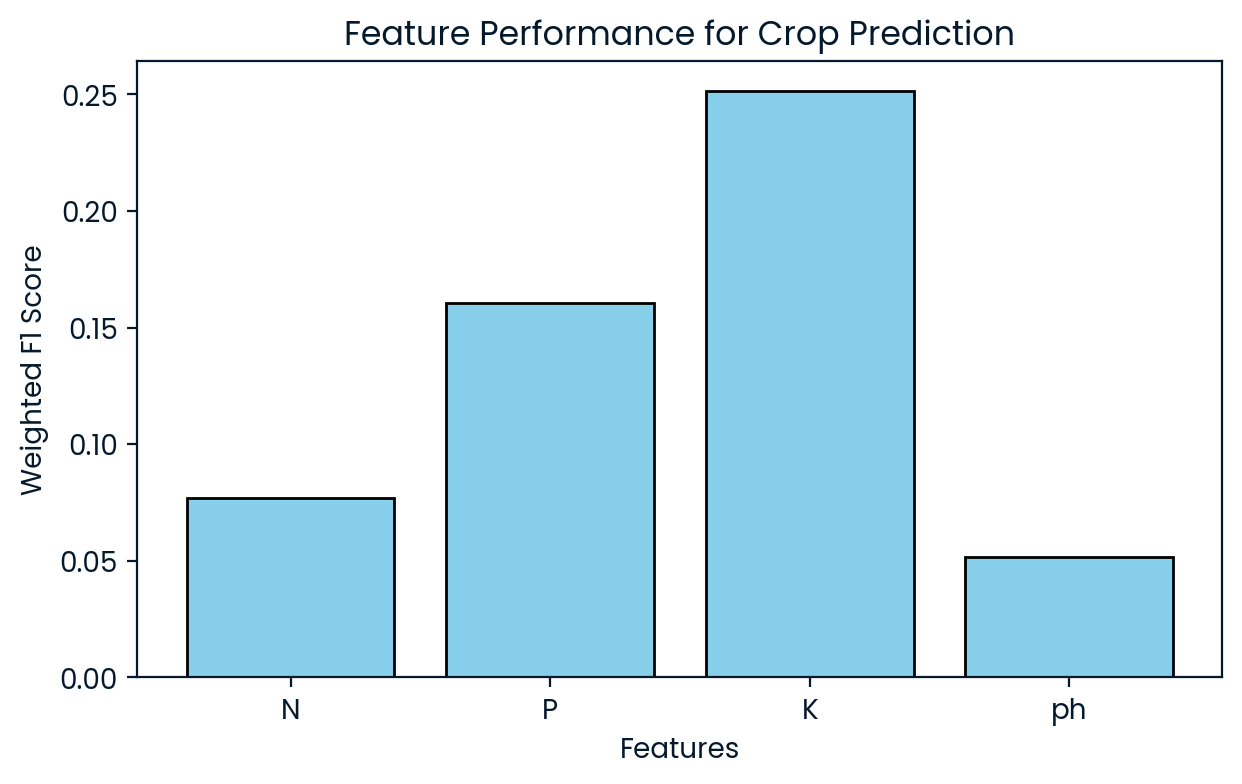

In [134]:
# All required libraries are imported here.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Loading the dataset
crops = pd.read_csv("soil_measures.csv")

# Exploratory data analysis (EDA)
print("-- Exploring the first 5 rows --")
print(crops.head())
print("\n-- General information about the dataset --")       
print(crops.info())
print("\n-- Statistical summary of numerical features --")
print(crops.describe())   
print("\n-- Distribution of crop categories (percentage) --")
print(crops['crop'].value_counts(normalize=True) *100)

# Feature Evaluation using Logistic Regression
X = crops.iloc[:, 0:4]
y = crops.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

log_reg = LogisticRegression(multi_class = "multinomial")

features_dict = {}
for feature in ["N", "P", "K", "ph"]:

    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    feature_performance = metrics.f1_score(y_test, y_pred, average='weighted')
    features_dict[feature] = feature_performance

print("\n-- Best Predictive Feature Based on F1 Score --")
best_predictive_feature = max(features_dict.items(), key=lambda item : item[1])
print(f"Feature: {best_predictive_feature[0]}") 
print(f"Score: {best_predictive_feature[1]}")

# Visualization
plt.figure(figsize=(7,4))
plt.bar(features_dict.keys(), features_dict.values(), color='skyblue', edgecolor='black')
plt.ylabel("Weighted F1 Score")
plt.xlabel("Features")
plt.title("Feature Performance for Crop Prediction")
plt.show()